In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Embedding , Dense , LSTM
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import TweetTokenizer
import warnings
warnings.filterwarnings('ignore')



In [ ]:
file_path = "/content/drive/MyDrive/dataset/SMSSpamCollection"


In [ ]:
with open(file_path, 'r') as file:
    data = file.readlines()

In [ ]:
data = [line.strip().split('\t') for line in data]

In [ ]:
df = pd.DataFrame(data, columns=['label', 'text'])

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
df['label'].value_counts()

ham     4827
spam     747
Name: label, dtype: int64

In [ ]:
le=LabelEncoder()

df['label']=le.fit_transform(df['label'])

In [ ]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5574, 2)

In [ ]:
texts=df['text']
texts

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

In [ ]:
voc_size=5000

##Data Preprocessing

In [ ]:
texts=texts.str.replace('[^a-zA-Z0-9]+',' ')
texts

0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                   Will b going to esplanade fr home 
5571    Pity was in mood for that So any other suggest...
5572    The guy did some bitching but I acted like i d...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [ ]:
stemmer=SnowballStemmer('english')
nltk.download('stopwords')
tk=TweetTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
texts=texts.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token: ' '.join(token))
texts

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he goe to usf he live around...
                              ...                        
5569    this is the 2nd time we have tri 2 contact u u...
5570                        will b go to esplanad fr home
5571       piti was in mood for that so ani other suggest
5572    the guy did some bitch but i act like i d be i...
5573                              rofl it true to it name
Name: text, Length: 5574, dtype: object

In [ ]:
texts=texts.apply(lambda x:[token for token in tk.tokenize(x) if token not in stopwords.words('english')]).apply(lambda token : ' '.join(token))
texts

0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5569    2nd time tri 2 contact u u 750 pound prize 2 c...
5570                                b go esplanad fr home
5571                                piti mood ani suggest
5572    guy bitch act like interest buy someth els nex...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

##One-hot representation

In [ ]:
onehot_rep=[one_hot(words,voc_size) for words in texts]
print(onehot_rep)

[[317, 1405, 2169, 3618, 2707, 4243, 2418, 1872, 1378, 1710, 860, 1857, 4783, 3562, 4453, 3891, 2872], [852, 1861, 2500, 1606, 1209, 1419], [707, 3878, 696, 2535, 1998, 2163, 1029, 3908, 1601, 2382, 3938, 4139, 831, 4330, 1029, 4686, 457, 3878, 4824, 2514, 1848, 2356, 1112, 4922, 2742, 4365], [1209, 2296, 3378, 449, 4514, 1209, 1112, 2333, 3378], [4792, 4099, 768, 2255, 741, 1360, 4645], [3563, 695, 1046, 2032, 4400, 4990, 1291, 4275, 2836, 4500, 1378, 852, 3485, 2514, 1347, 305, 1771, 1029, 2566], [2402, 4579, 4275, 4897, 1025, 4275, 233, 4186], [1985, 546, 183, 183, 4939, 2116, 1664, 2835, 4118, 2833, 248, 2723, 1543, 3264, 3080, 2833], [1127, 3743, 4458, 887, 1869, 4879, 857, 3089, 1691, 4305, 4422, 4887, 4305, 4350, 4547, 3045, 2723, 2049, 4243], [3070, 2470, 3684, 1209, 754, 4834, 999, 4245, 3315, 3070, 2278, 707, 4422, 3070, 999, 1605, 707, 664], [3002, 2286, 4492, 4667, 779, 1403, 450, 475, 4504, 4848, 4228, 1941], [4746, 1509, 2163, 4670, 2305, 3247, 3464, 827, 1848, 2405, 2470

In [ ]:
sent_len=20
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_len)
print(embedded_docs)

[[   0    0    0 ... 4453 3891 2872]
 [   0    0    0 ... 1606 1209 1419]
 [1029 3908 1601 ... 4922 2742 4365]
 ...
 [   0    0    0 ...  194 1354 1442]
 [   0    0    0 ... 1197  279  707]
 [   0    0    0 ... 1710 3847 1595]]


##Creating Model

In [ ]:
model=Sequential()
embedding_vector_features=40
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X=np.array(embedded_docs)
y=np.array(df['label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
model.fit(X_train,y_train,batch_size=50,epochs=10)

Epoch 1/10
79/79 [==============================] - 15s 126ms/step - loss: 0.2055 - accuracy: 0.9228
Epoch 2/10
79/79 [==============================] - 5s 64ms/step - loss: 0.0392 - accuracy: 0.9905
Epoch 3/10
79/79 [==============================] - 3s 34ms/step - loss: 0.0149 - accuracy: 0.9974
Epoch 4/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0086 - accuracy: 0.9987
Epoch 5/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 6/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0015 - accuracy: 0.9992
Epoch 7/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 8/10
79/79 [==============================] - 2s 29ms/step - loss: 1.2147e-04 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 1s 12ms/step - loss: 7.0879e-05 - accuracy: 1.0000
Epoch 10/10
79/79 [==============================] - 1s 15ms/step - loss: 5.6124e-05 - accuracy: 1.

In [ ]:
y_pred=model.predict(X_test)
y_pred

53/53 [==============================] - 1s 3ms/step


array([[4.1883730e-05],
       [2.5165615e-05],
       [4.3810764e-05],
       ...,
       [2.8018261e-05],
       [6.0285474e-05],
       [3.3541601e-05]], dtype=float32)

In [ ]:
y_pred=np.where(y_pred > 0.5 , 1 , 0)


In [ ]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1451
           1       0.91      0.90      0.90       222

    accuracy                           0.97      1673
   macro avg       0.95      0.94      0.95      1673
weighted avg       0.97      0.97      0.97      1673



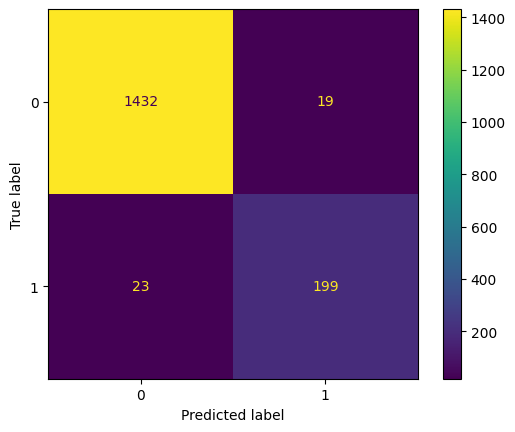

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))